### RFM Analysis is used to understand and segment customers based on their buying behaviour. RFM stands for recency, frequency, and monetary value, which are three key metrics that provide information about customer engagement, loyalty, and value to a business.

In [44]:
import pandas as pd
import numpy as np

In [45]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

# pio.renderers.default = 'notebook'

In [46]:
df = pd.read_csv("rfm_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [47]:
from datetime import datetime

# Convert 'PurchaseDate' to datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Function to change the year of a datetime object
def change_year(date, new_year):
    return date.replace(year=new_year)

# Apply the function to change the year to 2024
df['PurchaseDate'] = df['PurchaseDate'].apply(lambda x: change_year(x, 2024))

# Calculate Recency
df['Recency'] = (datetime.now() - df['PurchaseDate']).dt.days

# Check if 'Frequency' column already exists and remove it
if 'Frequency' in df.columns:
    df.drop(columns=['Frequency'], inplace=True)

# Calculate Frequency
frequency_data = df.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
df = df.merge(frequency_data, on='CustomerID', how='left')

# Check if 'MonetaryValue' column already exists and remove it
if 'MonetaryValue' in df.columns:
    df.drop(columns=['MonetaryValue'], inplace=True)

# Calculate Monetary Value
monetary_data = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
df = df.merge(monetary_data, on='CustomerID', how='left')

>By performing these calculations, we now have the necessary RFM values (recency, frequency, monetary value) for each customer, which are important indicators for understanding customer behaviour and segmentation in RFM analysis

In [48]:
# Define scoring criteria for each RFM value
recency_score = [5, 4, 3, 2, 1]
frequency_score = [1, 2, 3, 4, 5]
monetary_score = [1, 2, 3, 4, 5]

df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=recency_score)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequency_score)
df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins=5, labels=monetary_score)

df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,8814,2024-04-11,943.31,Product C,890075,Tokyo,59,1,943.31,1,1,2
1,2188,2024-04-11,463.70,Product A,176819,London,59,1,463.70,1,1,1
2,4608,2024-04-11,80.28,Product A,340062,New York,59,1,80.28,1,1,1
3,2559,2024-04-11,221.29,Product A,239145,London,59,1,221.29,1,1,1
4,9482,2024-04-11,739.56,Product A,194545,Paris,59,1,739.56,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2024-06-10,759.62,Product B,275284,London,-1,1,759.62,5,1,2
996,6669,2024-06-10,941.50,Product C,987025,New York,-1,1,941.50,5,1,2
997,8836,2024-06-10,545.36,Product C,512842,London,-1,1,545.36,5,1,2
998,1440,2024-06-10,729.94,Product B,559753,Paris,-1,1,729.94,5,1,2


- **RecencyScore** : We assigned scores from 5 to 1 to calculate the recency score, where a higher score indicates a more recent purchase.
- **FrequencyScore** : We assigned scores from 1 to 5 to calculate the frequency score, where a higher score indicates a higher purchase frequency.
- **MonetaryScore** : To calculate the monetary score, we assigned scores from 1 to 5, where a higher score indicates a higher amount spent by the customer.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   MonetaryValue       1000 non-null   float64       
 9   RecencyScore        1000 non-null   category      
 10  FrequencyScore      1000 non-null   category      
 11  MonetaryScore       1000 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 74.0+ KB


**Once the scores are added to the data, you will notice above there data type is categorical variables. So we need to convert their datatype into integers to use these scores further**

In [50]:
# Convert RFM scores to numeric type
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

# df.info()

### RFM Value Segmentation

In [51]:
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['Value Segment'] = pd.qcut(df['RFM_Score'], q=3, labels=segment_labels)

df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2024-04-11,943.31,Product C,890075,Tokyo,59,1,943.31,1,1,2,4,Low-Value
1,2188,2024-04-11,463.70,Product A,176819,London,59,1,463.70,1,1,1,3,Low-Value
2,4608,2024-04-11,80.28,Product A,340062,New York,59,1,80.28,1,1,1,3,Low-Value
3,2559,2024-04-11,221.29,Product A,239145,London,59,1,221.29,1,1,1,3,Low-Value
4,9482,2024-04-11,739.56,Product A,194545,Paris,59,1,739.56,1,1,2,4,Low-Value


In [52]:
segment_counts = df['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

# Define pastel colors for the bar chart
pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count', 
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

### RFM Customer Segments
> The above segments that we calculated are RFM value segments. Now we’ll calculate RFM customer segments. The RFM value segment represents the categorization of customers based on their RFM scores into groups such as “low value”, “medium value”, and “high value”. These segments are determined by dividing RFM scores into distinct ranges or groups, allowing for a more granular analysis of overall customer RFM characteristics. The RFM value segment helps us understand the relative value of customers in terms of recency, frequency, and monetary aspects.

In [53]:
# Create a new column for RFM Customer Segments
df['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
df.loc[df['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
df.loc[(df['RFM_Score'] >= 4) & (df['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
df.loc[(df['RFM_Score'] >= 3) & (df['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
print(df[['CustomerID', 'RFM Customer Segments']])

     CustomerID RFM Customer Segments
0          8814            Can't Lose
1          2188                  Lost
2          4608                  Lost
3          2559                  Lost
4          9482            Can't Lose
..          ...                   ...
995        2970   Potential Loyalists
996        6669   Potential Loyalists
997        8836   Potential Loyalists
998        1440   Potential Loyalists
999        4759   Potential Loyalists

[1000 rows x 2 columns]


### RFM Analysis

In [54]:
segment_product_counts = df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts, 
                                         path=['Value Segment', 'RFM Customer Segments'], 
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12396\3827645894.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



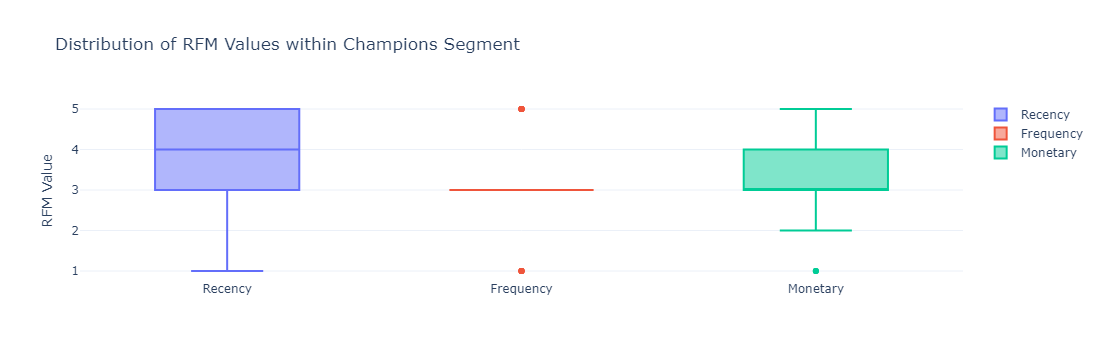

In [55]:
champions_segment = df[df['RFM Customer Segments'] == 'Champions']
# champions_segments.count()

fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment['RecencyScore'], name='Recency'))
fig.add_trace(go.Box(y=champions_segment['FrequencyScore'], name='Frequency'))
fig.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))

fig.update_layout(title='Distribution of RFM Values within Champions Segment',
                  yaxis_title='RFM Value',
                  showlegend=True)

fig.show()

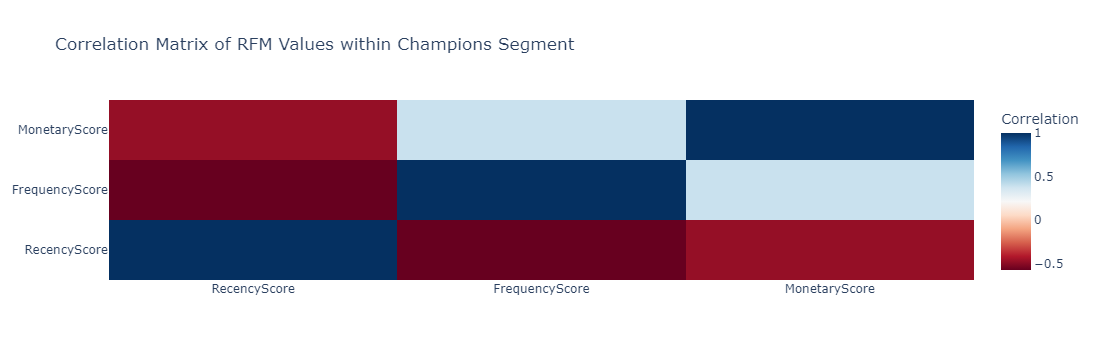

In [56]:
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()

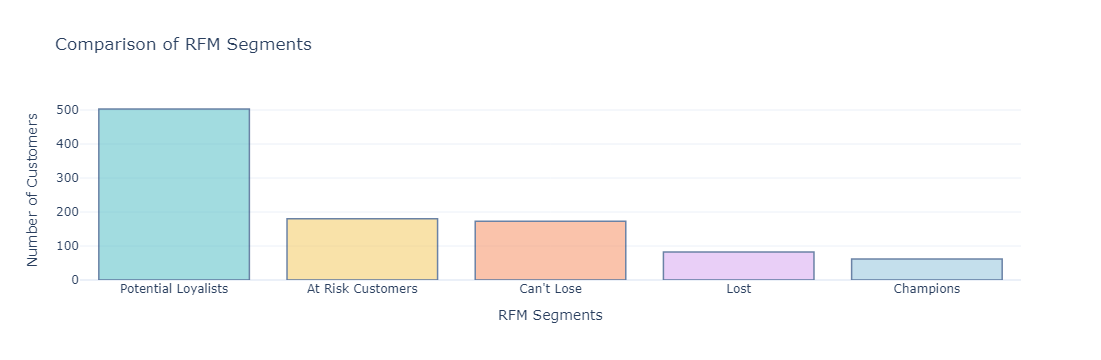

In [57]:
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = df['RFM Customer Segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()
             

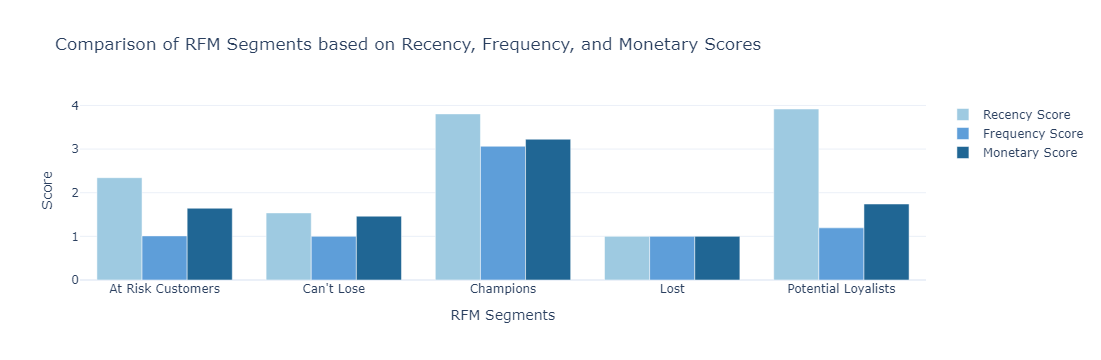

In [70]:
# Calculate the average Recency, Frequency, and Monetary scores for each segment
segment_scores = df.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()

# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['RecencyScore'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['FrequencyScore'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['MonetaryScore'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

# Show the figure
fig.show()


>Above code calculates the average Recency, Frequency, and Monetary scores for each RFM customer segment and visualizes this data using a grouped bar chart. Each segment's scores are displayed side by side for easy comparison, with different colors representing Recency, Frequency, and Monetary scores.

### Conclusion
>RFM Analysis is used to understand and segment customers based on their buying behaviour. RFM stands for recency, frequency, and monetary value, which are three key metrics that provide information about customer engagement, loyalty, and value to a business.